In [1]:
import pandas as pd

/var/folders/ns/mddrn5s94k97chjv9qxcxjc40000gn/T/ipykernel_36529/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("Heart.csv")

# Drop the first column as it contains the row number
df.drop(df.columns[0], axis=1, inplace=True)

df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [3]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True
3,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132,0,1.2,2,0.0,False,False,True,False,True
299,68,1,144,193,1,0,141,0,3.4,2,2.0,False,False,False,False,True
300,57,1,130,131,0,0,115,1,1.2,2,1.0,False,False,False,False,True
301,57,0,130,236,0,2,174,0,0.0,2,1.0,False,True,False,True,False


In [7]:
y

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
298    Yes
299    Yes
300    Yes
301    Yes
302     No
Name: AHD, Length: 303, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagging_test_errors = []
bagging_oob_errors = []
random_forest_test_errors = []
random_forest_oob_errors = []

n_estimators = [n for n in range(1, 301)]
for n in n_estimators:
    bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n, oob_score=True, random_state=18)
    bagging_clf.fit(X_train, y_train)
    bagging_test_errors.append(1 - bagging_clf.score(X_test, y_test))
    bagging_oob_errors.append(1 - bagging_clf.oob_score_)

    random_forest_clf = RandomForestClassifier(n_estimators=n, max_features="sqrt", oob_score=True, random_state=18)
    random_forest_clf.fit(X_train, y_train)
    random_forest_test_errors.append(1 - random_forest_clf.score(X_test, y_test))
    random_forest_oob_errors.append(1 - random_forest_clf.oob_score_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  o

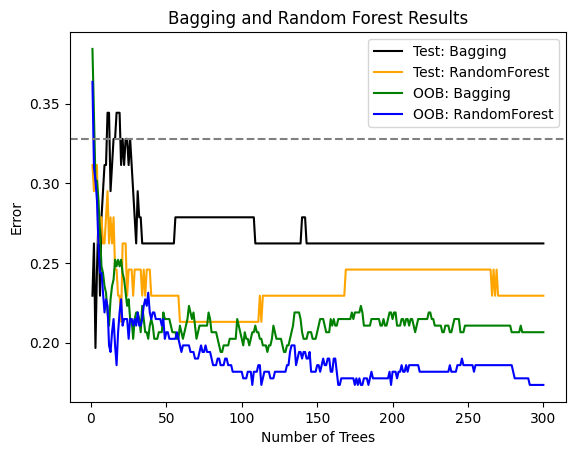

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(n_estimators, bagging_test_errors, label='Test: Bagging', color='black')
plt.plot(n_estimators, random_forest_test_errors, label='Test: RandomForest', color='orange')
plt.plot(n_estimators, bagging_oob_errors, label='OOB: Bagging', color='green')
plt.plot(n_estimators, random_forest_oob_errors, label='OOB: RandomForest', color='blue')

single_tree_clf = DecisionTreeClassifier(random_state=18)
single_tree_clf.fit(X_train, y_train)
single_tree_test_error = 1 - single_tree_clf.score(X_test, y_test)
plt.axhline(y=single_tree_test_error, color='gray', linestyle='--')

plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Bagging and Random Forest Results')
plt.legend(loc='best')
plt.show()